# Worksheet 13 

## To accompany Unit 6.2 The Fast Fourier Transform

We will step through this worksheet in class. 

You are expected to have at least watched the video presentation of {ref}`unit6.2` before coming to class. 

If you haven't watch it afterwards!

## Agenda

* The inefficiency of the DFT

* The FFT - a sketch of its development

* An illustration of part of the FFT algorithm

* FFT v DFT

* Two examples

* Amplitude and frequency scaling the FFT

## The inefficiency of the DFT

Consider a signal whose highest frequency is 18 kHz, the sampling frequency is 50 kHz, and 1024 samples are taken, i.e., $N=1024$.

The time required to compute the entire DFT would be:

$$t = \frac{1024\,\mathrm{samples}}{50\times 10^3\,\mathrm{samples\ per\ second}} = 20.48\,\mathrm{ms}$$

To compute the number of operations required to complete this task, let us expand the N-point DFT defined as:

$$X[m] = \sum_{n=0}^{N-1} x[n] W_N^{mn}$$

Then

$$\begin{eqnarray*}
  X[0] &=& x[0]W_N^0 + x[1]W_N^0 + x[1]W_N^0 +  \cdots  + x[N - 1]W_N^0 \hfill \\
  X[1] &=& x[0]W_N^0 + x[1]W_N^1 + x[1]W_N^2 +  \cdots  + x[N - 1]W_N^{N - 1} \hfill \\
  X[2] &=& x[0]W_N^0 + x[1]W_N^2 + x[1]W_N^4 +  \cdots  + x[N - 1]W_N^{2(N - 1)} \hfill \\
  \hfil &\cdots&  \hfill \\
  X[N - 1] &=& x[0]W_N^0 + x[1]W_N^{N - 1} + x[1]W_N^{2(N - 1)} +  \cdots  + x[N - 1]W_N^{(N - 1)^2} \hfill \\ 
\end{eqnarray*}$$

* It is worth remembering that 

$$W_N^0 = \exp\left(-j\frac{2\pi}{N}(0)\right) = 1.$$

* Since $W_N^i$ is a complex number, the computation of any frequency component $X[k]$ requires $N$ complex multiplications and $N$ complex additions

* $2N$ complex arithmetic operations are required to compute any frequency component of $X[k].$<sup>1</sup>

* If we assume that $x[n]$ is real, then only $N/2$ of the $X[m]$ components are unique.

* Therefore we would require $2N\times N/2 = N^2$ complex operations to compute the entire frequency spectrum.<sup>2</sup>

* For our example, the $N=1024$-point DFT, would require $1024^2 = 1,048,576$ complex operations

* These would have to be completed in 20.48 ms.

* This may be possible with modern computing hardware, perhaps even in a mobile phone, but it seems impractical.

* Fortunately, many of the $W_N$ terms in the computation are unity ($=\pm 1$).

* Moreover, because the $W_N^i$ points are equally spaced points on the unit circle;

* And because $N$ is a power of 2, the points on the upper-half plane (range $0 < \theta < \pi$ are the mirror image of the points on the lower-half plane range $\pi < \theta < 2\pi$;

* Thus, there is a great deal of symmetry in the computation that can be exploited to simplify the computation and reduce the number of operations considerably to a much more manageable $N\log_2 N$ operations<sup>3</sup>.

This is possible with the algorithm called the [FTT](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (fast Fourier transform) that was originally developed by [James Cooley](https://en.wikipedia.org/wiki/James_Cooley) and [John Tukey](https://en.wikipedia.org/wiki/John_Tukey) and has been considerably refined since.

## The Fast Fourier Transform (FFT)

The FFT is very well documented, including in Karris, so we will only sketch its development and present its main result. However, we will illustrate part of the algorithm to make concrete an idea of the efficiency advantage that the FFT has over the DFT that we have already seen.

Much of the development follows from the properties of the rotating vector.<sup>4</sup>

$$W_N=\exp\left(-\frac{j2\pi}{N}\right)$$

which results in some simplifications and mathematical short-cuts when $N$ is a power of 2.

The most useful properties are:

$$\begin{eqnarray*}
  W_N^N &=& \exp\left(-j\frac{2\pi}{N}N\right) = \exp\left(-j2\pi\right) = 1.\\
  W_N^{N/2} &=&  \exp\left(-j\frac{2\pi}{N}\frac{N}{2}\right) = \exp\left(-j\pi\right) = -1.\\
  W_N^{N/4} &=&  \exp\left(-j\frac{2\pi}{N}\frac{N}{4}\right) = \exp\left(-j\pi/2\right) = -j.\\
  W_N^{3N/4} &=&  \exp\left(-j\frac{2\pi}{N}\frac{3N}{4}\right) = \exp\left(-j3\pi/2\right) = j.\end{eqnarray*}$$

$$\begin{eqnarray*}
  W_N^{kN} &=&  \exp\left(-j\frac{2\pi}{N}kN\right) = \exp\left(-j2\pi\right) = 1,\,k=0,1,2,\ldots\\
  W_N^{kN+r} &=&  \exp\left(-j\frac{2\pi}{N}kN\right)\exp\left(-j\frac{2\pi}{N}r\right) = 1.W_N^r=W_N^r.\\
  W_{2N}^{k} &=&  \exp\left(-j\frac{2\pi}{2N}k\right) = \exp\left(-j\frac{2\pi}{N}\frac{k}{2}\right) = W_N^{k/2}.
\end{eqnarray*}$$

### Decomposition-in-Time FFT Algorithm

This development follows (Philips, *et al.*, 2015). It is called the *decomposition-in-time (DIT), radix-2, FFT*.

It allows us to visualize the FFT as a block diagram (for simulation) or a signal flow graph (for ease of drawing).

We start from a 2-point FFT ($N=2$), and work up to an 8-point FFT ($N=8$) before generalizing the result.

We have implemented each algorithm in Simulink so we are able illustrate these structures with executable examples as we go.

#### 2-Point DFT

$$X[k] = \sum_{n=0}^1 x[n]W^{nk}_2 = x[0]W_2^{0k} + X[1]W_2^{1k},\,k=0,1.$$

Because $W_2^{0k}=\exp\left(j0\right)=1$ and $W_2^{1k}=\exp\left(-j\pi k\right)=(-1)^k$, we write

$$\begin{eqnarray*}
X[0] &=& x[0]+x[1];\\
X[1] &=& x[0]-x[1].
\end{eqnarray*}$$

In general for the 2-point DFT, we have

$$X[k]=x[0]+(-1)^kx[1].$$

![Signal flow graph of 2-point DFT](pictures/2-point-dft-sfg.png)

An equivalent Simulink model in block diagram form is:

![2-point dft](pictures/2-point-dft.png)

#### Let's See it in MATLAB

[two_point_dft.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/two_point_dft.slx)

In [1]:
cd matlab
clear all
format compact
%imatlab_export_fig('print-svg')  % Static svg figures.

In [4]:
open two_point_dft

#### 4-point DFT

The 4-point DFT is given by

$$\begin{eqnarray*}
X[k] &=& \sum_{n=0}^3 x[n]W_4^{nk}\\
     &=& x[0]W_4^{0k} + x[1]W_4^{1k} + x[2]W_4^{2k} + x[3]W_4^{3k}.\end{eqnarray*}$$

As a result of the periodicity of the weighting factor, we can simplify this expression:

$$\begin{eqnarray*}
W_N^{nk} &=& \exp\left(-j(2\pi/N)nk\right);\\
W_4^{0k} &=& 1;\\
W_4^{1k} &=& \exp\left(-j(\pi/2)k\right) = (-j)^k;\\
W_4^{2k} &=& \exp\left(-j\pi k\right) = (-1)^k;\\
W_4^{3k} &=& W_4^{2k}W_4^{1k}=(-1)^k W_4^{1k}.
\end{eqnarray*}$$

Using these results, we write

$$\begin{eqnarray*}
X[k] &=&  x[0] + x[1]W_4^{1k} + x[2](-1)^k + x[3](-1)^kW_4^{1k},\\
X[k] &=&  \left[x[0] + x[2](-1)^k\right] + \left[x[1] +  x[3](-1)^k\right]W_4^{1k}.
\end{eqnarray*}$$

To clarify the next step, we define two new variables

$$\begin{eqnarray*}
x_e[n]&=&x[2n],\,n=0,1;\\
x_o[n]&=&x[2n+1],\,n=0,1.
\end{eqnarray*}$$

Then,

$$X[k] =  \left[x_e[0] + x_e[1](-1)^k\right] +\left[x_o[0] + x_o[1](-1)^k\right]W_4^{1k}.$$

The factors in brackets in this equation can be recognized as 2-point DFTs:

$$\begin{eqnarray*}
X_e[m] &=& x_e[0] + x_e[1](-1)^m,\;m=0,1;\\
X_o[m] &=& x_o[0] + x_o[1](-1)^m,\;m=0,1.
\end{eqnarray*}$$

Note that $X_e[k]$ and $X_o[k]$ are periodic; for example,

$$X_e[2]= x_e[0]+ x_e[1](-1)^2 = X_e[0]$$

and

$$X_o[3]= x_o[0]+ x_o[1](-1)^3 = X_o[1]$$

The 4-point DFT then is

$$\begin{eqnarray*}
X[0] &=& X_e[0] + X_o[0]W_4^{1(0)} = X_e[0] + X_o[0];\\
X[1] &=& X_e[1] + X_o[1]W_4^{1(1)} = X_e[0] + X_o[0]W_4^1;\\
X[2] &=& X_e[0] - X_o[0]W_4^{1(2)} = X_e[0] + X_o[0];\\
X[3] &=& X_e[1] - X_o[1]W_4^{1(3)} = X_e[0] + X_o[0]W_4^1.
\end{eqnarray*}$$

We see that the 4-point DFT can be computed by the generation of two 2-point DFTs, followed by a *recomposition* of terms as shown in the signal flow graph below:

![Signal flow graph of 4-point DFT](pictures/4-point-dft-sfg.png)

In other words,

[4-point DFT of $x[n]$] = [2-point DFT of $x_e[n]$] + $W_4^{1k}$[2-point DFT of $x_o[n]$].

### In Class Example 1

Use four-point DIT FFT to confirm that the DFT of the sequence 

$$x[n] = [1, 2, 3, 4]$$

is 

$$X[m] = [10, -2+j2, -2, -2-j2].$$

<pre style="border: 2px solid blue">






















</pre>

#### SIMULINK Model of 4-Point DFT

[four_point_dft.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/four_point_dft.slx)

In [5]:
open four_point_dft

#### 8-point DFT

$$X[k] = \sum_{n=0}^{7}x[n]W_8^{nk}.$$

After some manipulation, not reproduced here, it can be shown that the 8-point DFT is the recombination of two, 4-point DFTs that operate on the even and odd numbered values in the sequence $x[n]$ respectively.

#### Signal flow graph of 8-point DFT

![Signal flow graph of 8-point DFT](pictures/8-point-dft-sfg.png)

#### SIMULINK Model of 8-Point DFT

[eight_point_dft.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/eight_point_dft.slx)

In [6]:
open eight_point_dft

#### N-Point, radix-2 DIT FFT

In general, the $N$-point, radix-2 DIT FFT is computed as the recomposition of two $(N/2)$-point FFTs) as shown in the buterfly diagram below

![N-point FFT](pictures/n-point-fft.png)

### Decomposition-in-Frequency FFT

Another approach to forming the FFT is the so-called decomposition in frequency (DIF) FFT. 

We will not cover it's development in detail (see Karris and Phillips *et al.*) if you want to follow it through.

We instead illustrate the final result for the four-point DIF FFT.

#### Signal flow graph for 4-point DIF FFT

![Signal flow chart for 4-point DIF FFT](pictures/4-point-dif-fft.png)

Note that the structure is a 4-point decompostion followed by two 2-point FFTs.

Also note that it is frequency $X_n[k]$ that is the input to the DFT stage.

#### SIMULINK Model of 4-Point DIF FFT

[four_point_dif.slx](https://cpjobling.github.io/eg-247-textbook/dft/2/matlab/four_point_dif.slx)

In [7]:
open four_point_dif

### In Class Example 2

Use four two-point DIF FFT to confirm that the DFT of the sequence 

$$x[n] = [1, 2, 3, 4]$$

is 

$$X[m] = [10, -2+j2, -2, -2-j2].$$

<pre style="border: 2px solid blue">






















</pre>

## Efficiency of the FFT

Wether we implement it as a Decomposition-in-Time (DIT) or a Decomposition-in-Frequency (DIF), the FFT ends up having approximately $(N/2)\log_2(N)$ multiplications and a similar number of complex additions or subtractions. 

In other words, $(N)\log_2(N)$ complex arithmetic operations.

As complex arithmetic, particularly multiplication, is very expensive, this is a great saving over the DFT which has of order $N^2$ operations.

### DFT and FFT Comparisons

Under the assumptions about the relative efficiency of the DFT and FFT we can create a table like that shown below:


| &nbsp; |  &nbsp;      | DFT         | FFT         | FFT/DFT   |
|--------|--------------|-------------|-------------|-----------|
| N      | $\log_2 N$   | $N^2$       | $N\log_2 N$ |         % | 
| 8      | 3            | 64          | 24          | 37.5      |
| 16     | 4            | 256         | 64          | 25        |
| 32     | 5            | 1,024       | 160         | 15.6      |
| 64     | 6            | 4,096       | 384         | 9.4       |
| 128    | 7            | 16,384      | 896         | 5.5       |
| 256    | 8            | 65,536      | 2,048       | 3.1       |
| 512    | 9            | 261,144     | 4,608       | 1.8       |
| 1024   | 10           | 1,048,576   | 10,240      | 1         |
| 2048   | 11           | 4,194,304   | 22,528      | 0.5       |

As you can see, the efficiency of the FFT actual gets better as the number of samples go up! 

However, there are other costs, such as the data storage needed for intermediate steps, that need to be taken into account as well. For example, an 8-point FFT requires only a 3 stage decomposition, with each stage needing storage for 8 complex numbers. That is 24 in all. Whereas a 2048 sequence will require 11 stages, storing 2048 values each. That is a total of 22,528 complex values<sup>6</sup>.

## In Class Demonstrations

### FFT in MATLAB

The FFT algorithm is implemented, in MATLAB, as the function `fft`. We will work through Exercises 6 and 7 from section 10.8 of Karris.

### Example 3

Plot the Fourier transform of the rectangular pulse shown below, using the MATLAB `fft` func-tion. Then, use the `ifft` function to verify that the inverse transformation produces the rectangular pulse.

![Example 1](pictures/fft_example1.png)

#### FFT for Example 3

The rectangular pulse can be produced like so

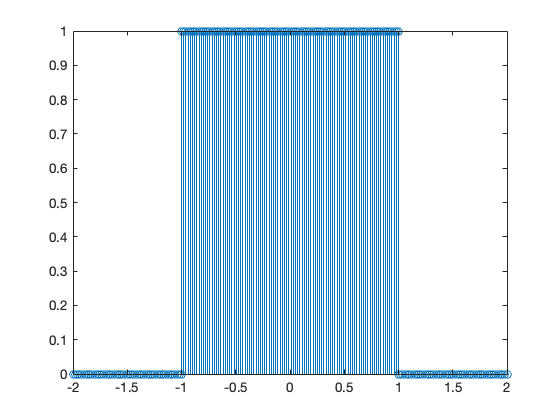

In [14]:
x = [linspace(-2,-1,50) linspace(-1,1,100) linspace(1,2,50)];
y = [linspace(0,0,50) linspace(1,1,100) linspace(0,0,50)];
stem(x,y);
N = length(x);

and the FFT is produced as

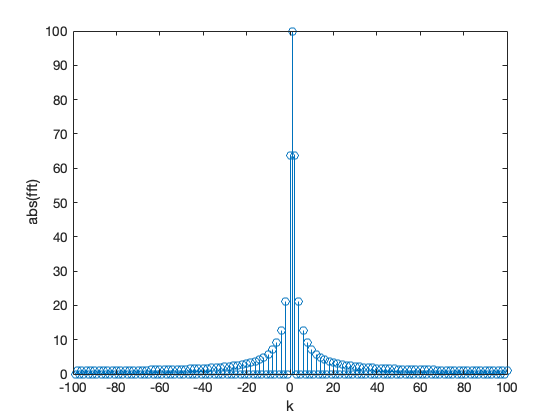

In [16]:
stem(abs(fft(y)))
stem(-N/2+1:N/2,abs(fftshift(fft(y)))) % Note change in x index to get axis labels correct
xlabel('k'),ylabel('abs(fft)')

unwind

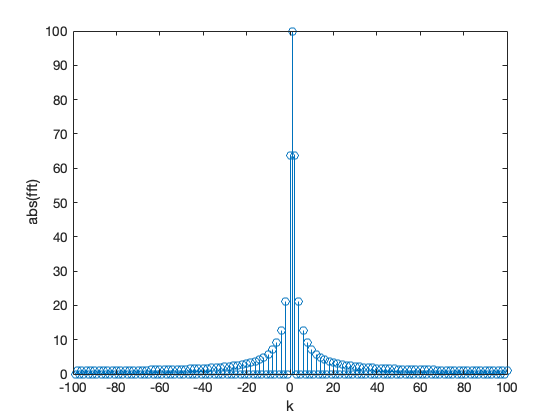

In [19]:
stem(-N/2+1:N/2, abs(fftshift(fft(y)))) % Note change in x index for index $k$ into positive/negative frequency bins
xlabel('k'),ylabel('abs(fft)')

The inverse FFT is obtained with

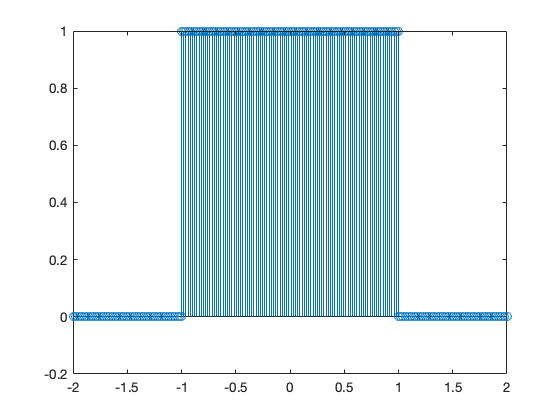

In [11]:
stem(x, ifft(fft(y)))

### Example 4

![Example 2](pictures/fft_example2.png)

#### FFT Example 4

The triangular pulse is obtained with

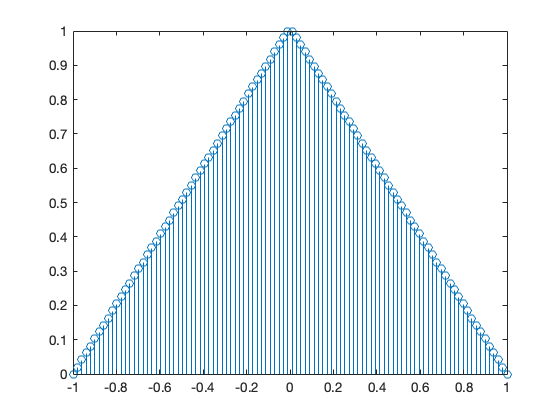

In [25]:
x = linspace(-1,1,100);
y = [linspace(0,1,50) linspace(1,0,50)];
stem(x,y)
N = length(y);

and the FFT is obtained with

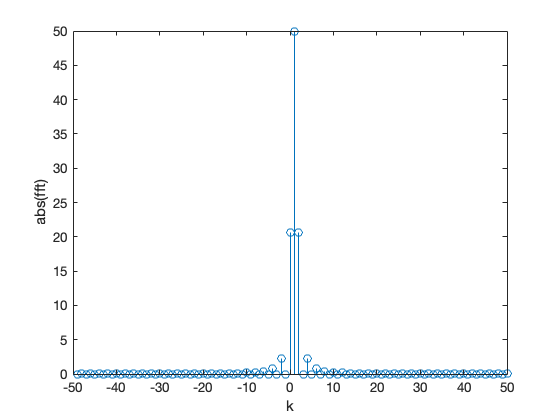

In [26]:
stem(-N/2 + 1:N/2, abs(fftshift(fft(y))))
xlabel('k'),ylabel('abs(fft)')

The inverse FFT is obtained with

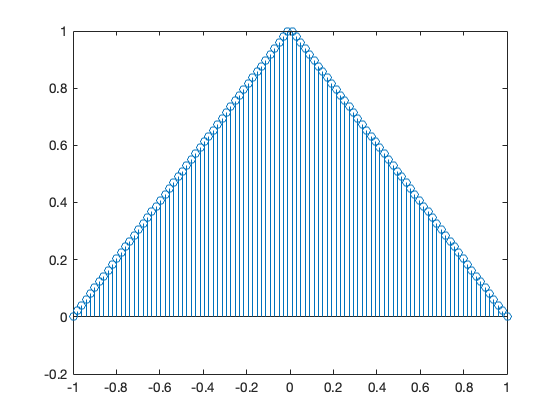

In [27]:
stem(x, ifft(fft(y)))

## Time and Amplitude Scaling

This is covered in the <a href="https://cpjobling.github.io/eg-247-textbook/dft/2/fft.html#frequency-and-amplitude-scaling">notes for this section</a>.

## Summary

* The inefficiency of the DFT
* The FFT - a sketch of its development
* An illustration of part of the FFT algorithm
* FFT v DFT
* Two examples